In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import geopandas as gpd
import os

/home/liaom/.local/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-1-a37ec8192505>:8: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (cal

In [2]:
# specify working directory
os.chdir('/gpfs/data1/oshangp/liaom/code/CDM/after0428/state')

# Input Data

In [17]:
uni_iobgm1s_coefs_df = pd.read_csv('res/uni_iobgm1s_coefs_df.csv')  
uni_niom1s_coefs_df = pd.read_csv('res/uni_niom1s_coefs_df.csv') 
uni_giom1s_coefs_df = pd.read_csv('res/uni_giom1s_coefs_df.csv') 

uni_giom1s_coefs_df = uni_giom1s_coefs_df.rename(columns = {'sigma':'sigma_io'})

In [18]:
uni_rho = pd.DataFrame()
uni_nu = pd.DataFrame()
uni_beta = pd.DataFrame()
uni_delta = pd.DataFrame()
uni_sigma_io = pd.DataFrame()

In [19]:
# uni_dataframes = [uni_iobgm1s_coefs_df, uni_niom_coefs_df, uni_giom_coefs_df, uni_niom_coefs_df, uni_giom_coefs_df, uni_ccdiom_coefs_df, uni_gcdiom_coefs_df]
# coefs_dataframes = [uni_rho, uni_nu, uni_beta, uni_delta, uni_gamma]
# model_names = ['bgm', 'niom', 'giom', 'niom', 'giom', 'ccdiom', 'gcdiom']

uni_dataframes = [uni_iobgm1s_coefs_df, uni_niom1s_coefs_df, uni_giom1s_coefs_df]
coefs_dataframes = [uni_rho, uni_nu, uni_beta, uni_delta]
model_names = ['bgm', 'n-iom', 'g-iom']

for unidf, model in zip(uni_dataframes, model_names):
    uni_rho[model] = unidf['rho']
    uni_nu[model] = unidf['nu']
    uni_beta[model] = unidf['beta']
    if 'delta' in unidf.columns:
        uni_delta[model] = unidf['delta']
    if 'sigma_io' in unidf.columns:
        uni_sigma_io[model] = unidf['sigma_io']


In [20]:
ran_iobgm1s_coefs_df = pd.read_csv('res/ran_iobgm1s_coefs_df.csv')  
ran_niom1s_coefs_df = pd.read_csv('res/ran_niom1s_coefs_df.csv') 
ran_giom1s_coefs_df = pd.read_csv('res/ran_giom1s_coefs_df.csv') 

ran_giom1s_coefs_df = ran_giom1s_coefs_df.rename(columns = {'sigma':'sigma_io'})

In [21]:
ran_rho = pd.DataFrame()
ran_nu = pd.DataFrame()
ran_beta = pd.DataFrame()
ran_delta = pd.DataFrame()
ran_sigma_io = pd.DataFrame()

In [22]:
# ran_dataframes = [ran_iobgm1s_coefs_df, ran_niom_coefs_df, ran_giom_coefs_df, ran_niom_coefs_df, ran_giom_coefs_df, ran_ccdiom_coefs_df, ran_gcdiom_coefs_df]
# coefs_dataframes = [ran_rho, ran_nu, ran_beta, ran_delta, ran_gamma]
# model_names = ['bgm', 'niom', 'giom', 'niom', 'giom', 'ccdiom', 'gcdiom']

ran_dataframes = [ran_iobgm1s_coefs_df, ran_niom1s_coefs_df, ran_giom1s_coefs_df]
coefs_dataframes = [ran_rho, ran_nu, ran_beta, ran_delta]
model_names = ['bgm', 'n-iom', 'g-iom']

for randf, model in zip(ran_dataframes, model_names):
    ran_rho[model] = randf['rho']
    ran_nu[model] = randf['nu']
    ran_beta[model] = randf['beta']
    if 'delta' in randf.columns:
        ran_delta[model] = randf['delta']
    if 'sigma_io' in randf.columns:
        ran_sigma_io[model] = randf['sigma_io']


In [23]:
clu_iobgm1s_coefs_df = pd.read_csv('res/clu_iobgm1s_coefs_df.csv')  
clu_niom1s_coefs_df = pd.read_csv('res/clu_niom1s_coefs_df.csv') 
clu_giom1s_coefs_df = pd.read_csv('res/clu_giom1s_coefs_df.csv') 

clu_giom1s_coefs_df = clu_giom1s_coefs_df.rename(columns = {'sigma':'sigma_io'})

In [24]:
clu_rho = pd.DataFrame()
clu_nu = pd.DataFrame()
clu_beta = pd.DataFrame()
clu_delta = pd.DataFrame()
clu_sigma_io = pd.DataFrame()

In [25]:
# clu_dataframes = [clu_iobgm1s_coefs_df, clu_niom_coefs_df, clu_giom_coefs_df, clu_niom_coefs_df, clu_giom_coefs_df, clu_ccdiom_coefs_df, clu_gcdiom_coefs_df]
# coefs_dataframes = [clu_rho, clu_nu, clu_beta, clu_delta, clu_gamma]
# model_names = ['bgm', 'niom', 'giom', 'niom', 'giom', 'ccdiom', 'gcdiom']

clu_dataframes = [clu_iobgm1s_coefs_df, clu_niom1s_coefs_df, clu_giom1s_coefs_df]
coefs_dataframes = [clu_rho, clu_nu, clu_beta, clu_delta, clu_sigma_io]
model_names = ['bgm', 'n-iom', 'g-iom']

for cludf, model in zip(clu_dataframes, model_names):
    clu_rho[model] = cludf['rho']
    clu_nu[model] = cludf['nu']
    clu_beta[model] = cludf['beta']
    if 'delta' in cludf.columns:
        clu_delta[model] = cludf['delta']
    if 'sigma_io' in cludf.columns:
        clu_sigma_io[model] = cludf['sigma_io']


# Plot Parameters in Each System

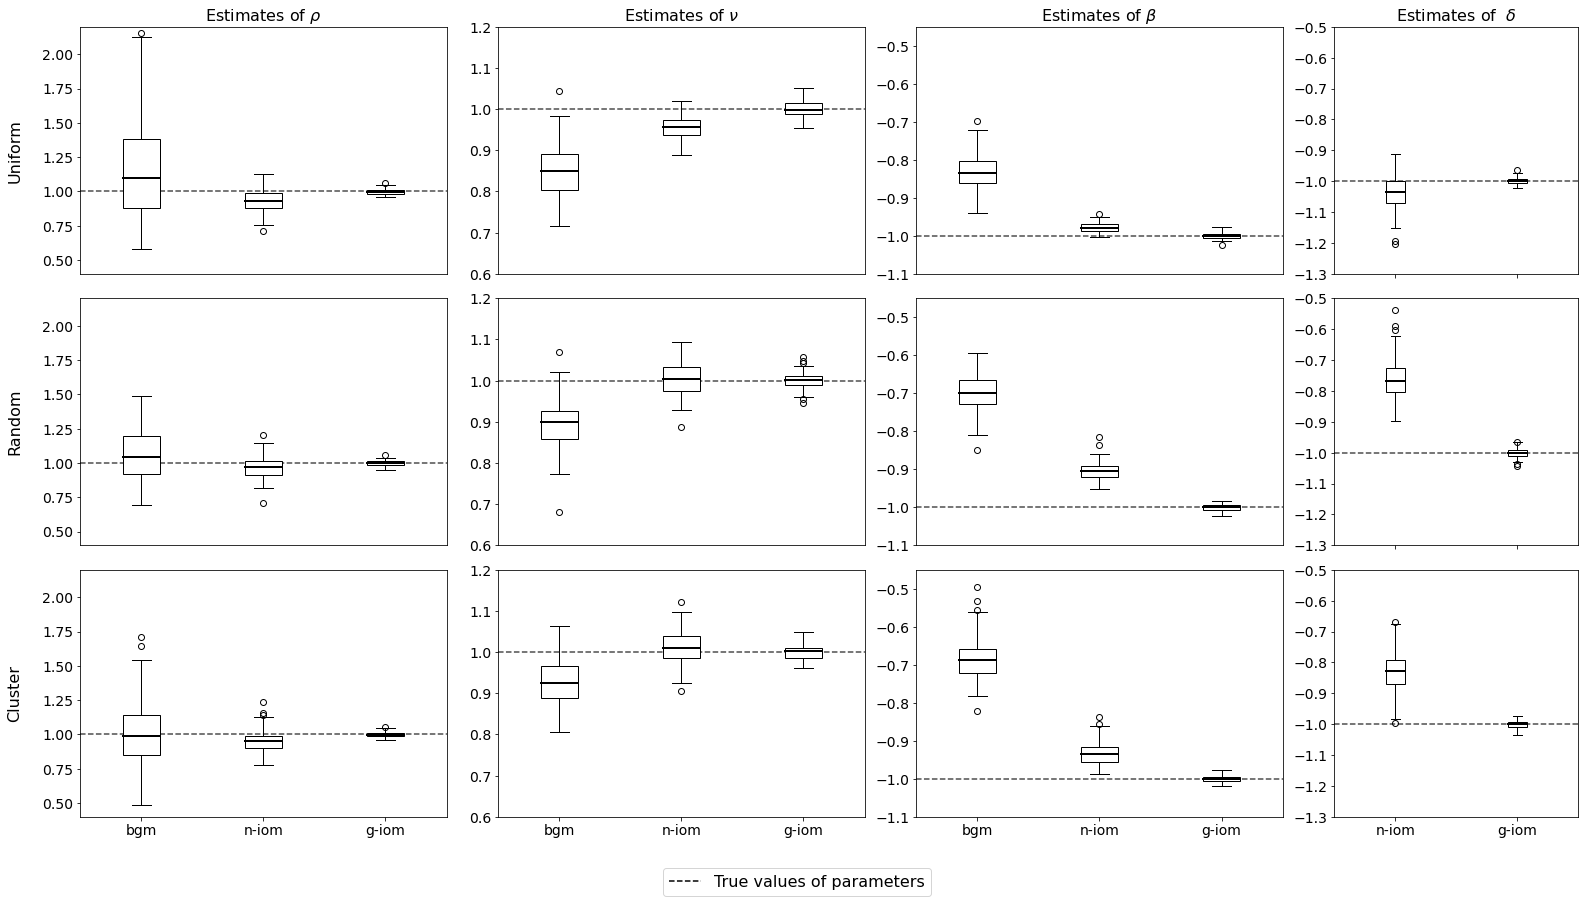

In [27]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

colors1 = ['#9fc5e9','#6fa8dd', '#3d85c5', '#0b5394', '#073762']
colors2 = ['#6fa8dd', '#0b5394', '#073762']
colors3 = ['#3d85c5', '#0b5394', '#073762']

# Create the figure with a specific size
fig = plt.figure(figsize=(22, 12))

# Set up a GridSpec with 3 rows and 5 columns
# Adjust width ratios: wider for first three columns, narrower for last two
width_ratios = [3, 3, 3, 2]  # This assumes the first three need to be proportionally wider
gs = GridSpec(nrows=3, ncols=4, width_ratios=width_ratios, figure=fig)

uni_coefs_dfs1 = [uni_rho, uni_nu, uni_beta]
uni_coefs_names1 = [r'$\rho$', r'$\nu$', r'$\beta$']

for idx, uni_coef_df, uni_coef_name in zip([0, 1, 2], uni_coefs_dfs1, uni_coefs_names1):
    ax = fig.add_subplot(gs[idx])
    #ax0 = fig.add_subplot(gs[0])

    # Create boxplots. The 'patch_artist=True' is necessary to fill the boxes with color
    bp = ax.boxplot([uni_coef_df[col] for col in uni_coef_df.columns], patch_artist=True)

    # Color each box and plot the means, set median line color
    # for i, (patch, color) in enumerate(zip(bp['boxes'], colors1), start=1):
        # patch.set_facecolor(color)
    for i, patch in enumerate(bp['boxes']):
        patch.set_facecolor('white')
        # Calculate and plot the mean
        mean_value = uni_coef_df.iloc[:, i-1].mean()

        bp['medians'][i-1].set_color('black')
        bp['medians'][i-1].set_linewidth(2)
        # ax.plot(i, mean_value, 'ko', markersize=10, markeredgecolor='black', markerfacecolor='black', zorder = 3)
        # Set the median line color to black

    ax.axhline(y=-1.0, color='black', linestyle='--', linewidth=1.5, alpha=0.7) #783114
    ax.axhline(y=1.0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    if idx == 0:
        ax.set_ylabel('Uniform',fontsize=16, labelpad=20)#, rotation=0, labelpad=20) 
        ax.set_ylim((0.4, 2.2))
    if idx == 1:
        ax.set_ylim((0.6, 1.2))
    if idx == 2:
        ax.set_ylim((-1.1, -0.45))
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xticks([])
    ax.set_title(f'Estimates of {uni_coef_name}', fontsize=16)

ran_coefs_dfs1 = [ran_rho, ran_nu, ran_beta]
ran_coefs_names1 = ['rho', 'nu', 'beta']

for idx, ran_coef_df, ran_coef_name in zip([4, 5, 6], ran_coefs_dfs1, ran_coefs_names1):
    ax = fig.add_subplot(gs[idx])
    #ax0 = fig.add_subplot(gs[0])

    # Create boxplots. The 'patch_artist=True' is necessary to fill the boxes with color
    bp = ax.boxplot([ran_coef_df[col] for col in ran_coef_df.columns], patch_artist=True)

    # Color each box and plot the means, set median line color
    # for i, (patch, color) in enumerate(zip(bp['boxes'], colors1), start=1):
        # patch.set_facecolor(color)
    for i, patch in enumerate(bp['boxes']):
        patch.set_facecolor('white')
        # Calculate and plot the mean
        mean_value = ran_coef_df.iloc[:, i-1].mean()

        bp['medians'][i-1].set_color('black')
        bp['medians'][i-1].set_linewidth(2)
        # ax.plot(i, mean_value, 'ko', markersize=10, markeredgecolor='black', markerfacecolor='black', zorder = 3)
        # Set the median line color to black

    if ran_coef_name in ['beta']:
        ax.axhline(y=-1.0, color='black', linestyle='--', linewidth=1.5, alpha=0.7) #
    if ran_coef_name in ['rho', 'nu']:
        ax.axhline(y=1.0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
    ax.set_xlabel('')
    ax.set_ylabel('')

    if idx == 4:
        ax.set_ylim((0.4, 2.2))
        ax.set_ylabel('Random',fontsize=16, labelpad=20)#, rotation=0, labelpad=20) 
    if idx == 5:
        ax.set_ylim((0.6, 1.2))
    if idx == 6:
        ax.set_ylim((-1.1, -0.45))
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xticks([])
    
clu_coefs_dfs1 = [clu_rho, clu_nu, clu_beta]
clu_coefs_names1 = ['rho', 'nu', 'beta']

for idx, clu_coef_df, clu_coef_name in zip([8, 9, 10], clu_coefs_dfs1, clu_coefs_names1):
    ax = fig.add_subplot(gs[idx])
    #ax0 = fig.add_subplot(gs[0])

    # Create boxplots. The 'patch_artist=True' is necessary to fill the boxes with color
    bp = ax.boxplot([clu_coef_df[col] for col in clu_coef_df.columns], patch_artist=True)

    # Color each box and plot the means, set median line color
    # for i, (patch, color) in enumerate(zip(bp['boxes'], colors1), start=1):
        # patch.set_facecolor(color)
    for i, patch in enumerate(bp['boxes']):
        patch.set_facecolor('white')
        # Calculate and plot the mean
        mean_value = clu_coef_df.iloc[:, i-1].mean()

        bp['medians'][i-1].set_color('black')
        bp['medians'][i-1].set_linewidth(2)
        # ax.plot(i, mean_value, 'ko', markersize=10, markeredgecolor='black', markerfacecolor='black', zorder = 3)
        # Set the median line color to black

    ax.set_xticklabels(clu_coef_df.columns)
    if clu_coef_name in ['beta']:
        ax.axhline(y=-1.0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
    if clu_coef_name in ['rho', 'nu']:
        ax.axhline(y=1.0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
    ax.set_xlabel('')

    if idx == 8:
        ax.set_ylim((0.4, 2.2))
        ax.set_ylabel('Cluster',fontsize=16, labelpad=20)#, rotation=0, labelpad=20) 
    if idx == 9:
        ax.set_ylim((0.6, 1.2))
    if idx == 10:
        ax.set_ylim((-1.1, -0.45))
    ax.tick_params(axis='both', labelsize=14)

delta_dfs = [uni_delta, ran_delta, clu_delta]

for idx, delta_df in zip([3, 7, 11], delta_dfs):
    ax = fig.add_subplot(gs[idx])
    #ax0 = fig.add_subplot(gs[0])

    # Create boxplots. The 'patch_artist=True' is necessary to fill the boxes with color
    bp = ax.boxplot([delta_df[col] for col in delta_df.columns], patch_artist=True)

    # Color each box and plot the means, set median line color
    for i, patch in enumerate(bp['boxes']):
        patch.set_facecolor('white')
        # Calculate and plot the mean
        mean_value = delta_df.iloc[:, i-1].mean()

        bp['medians'][i-1].set_color('black')
        bp['medians'][i-1].set_linewidth(2)
        # ax.plot(i, mean_value, 'ko', markersize=10, markeredgecolor='black', markerfacecolor='black', zorder = 3)
        # Set the median line color to black

    ax.axhline(y=-1.0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.set_ylim((-1.3, -0.5))
    if idx == 11:
        ax.set_xticklabels(delta_df.columns)
    ax.tick_params(axis='both', labelsize=14)
    if idx == 3:
        ax.set_title(r'Estimates of  $\delta$', fontsize=16)
        
# Add a dummy dashed line for the legend
dummy_line = plt.Line2D([], [], color='black', linestyle='--', linewidth=1.5, 
                        label='True values of parameters')

# adjust plot
plt.tight_layout()
# Adjust layout and add the legend outside the figure
plt.subplots_adjust(bottom=0.05)  # Adds space at the bottom for the legend
fig.legend(handles=[dummy_line], loc='upper center', bbox_to_anchor=(0.5, -0.0), fontsize=16, ncol=1)

plt.savefig('results/parameters_est_1s_io.png', dpi = 300, bbox_inches='tight')
plt.show()

# Plot Hyperparameters in Each System

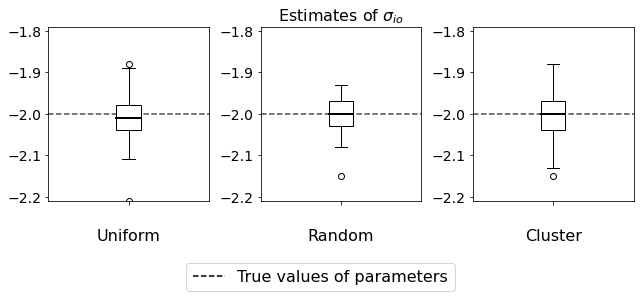

In [28]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create the figure with a specific size
fig = plt.figure(figsize=(9, 3))

# Set up a GridSpec with 3 rows and 5 columns
# Adjust width ratios: wider for first three columns, narrower for last two
width_ratios = [2, 2, 2]  # This assumes the first three need to be proportionally wider
gs = GridSpec(nrows=1, ncols=3, width_ratios=width_ratios, figure=fig)

sigma_io_dfs = [uni_sigma_io, ran_sigma_io, clu_sigma_io]

for idx, sigma_io_df in zip([0, 1, 2], sigma_io_dfs):
    ax = fig.add_subplot(gs[idx])
    #ax0 = fig.add_subplot(gs[0])

    # Create boxplots. The 'patch_artist=True' is necessary to fill the boxes with color
    bp = ax.boxplot([sigma_io_df[col] for col in sigma_io_df.columns], patch_artist=True)

    # Color each box and plot the means, set median line color
    for i, patch in enumerate(bp['boxes']):
        patch.set_facecolor('white')
        # Calculate and plot the mean
        mean_value = sigma_io_df.iloc[:, i-1].mean()

        bp['medians'][i-1].set_color('black')
        bp['medians'][i-1].set_linewidth(2)
        # ax.plot(i, mean_value, 'ko', markersize=10, markeredgecolor='black', markerfacecolor='black', zorder = 3)
        # Set the median line color to black

    ax.axhline(y=-2.0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.set_ylim((-2.21, -1.79))
    ax.tick_params(axis='both', labelsize=14)
    if idx == 0:
        ax.set_xlabel('Uniform',fontsize=16, labelpad=20)
    if idx == 1:
        ax.set_title(r'Estimates of $\sigma_{io}$', fontsize=16)
        ax.set_xlabel('Random',fontsize=16, labelpad=20)
    if idx == 2:
        ax.set_xlabel('Cluster',fontsize=16, labelpad=20)

# Add a dummy dashed line for the legend
dummy_line = plt.Line2D([], [], color='black', linestyle='--', linewidth=1.5, 
                        label='True values of parameters')

# adjust plot
plt.tight_layout()
# Adjust layout and add the legend outside the figure
plt.subplots_adjust(bottom=0.05)  # Adds space at the bottom for the legend
fig.legend(handles=[dummy_line], loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize=16, ncol=1)
plt.savefig('results/hyperparameters_est_1s_io.png', dpi = 300, bbox_inches='tight')
plt.show()
